## Exercise : Exploring Matplotlib and Linear Regression

**Exercise 6 : Exploring Matplotlib and Linear Regression

** Create a Scatter plot for the fields (weight and miles per gallon) from the data set mtcars.csv  
1.1 make the dots ‘green’  
1.2 Label the graph “Car weight vs miles per gallon”  
1.3 Add x and y axis labels  
1.4 Create a Horizontal span between 12.5 and 25 mpg  
1.5 Create a Vertical span between 4.0 and 5.0 tons (Car Weight)  

In [20]:
# Import libraries
import os, csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [24]:
path = os.getcwd() 
sourcepath = path + '\\sourcedata\\'
filename = 'mtcars.csv'
csvfile = os.path.join(sourcepath, filename)
#print(path)
#print(csvfile)

In [26]:
if not path == '' and path:
    print('Path exists')
    if os.path.isfile(csvfile):
        print('File exists')
    else:
        print('Cannot find file')
else:
    print('File directory Path cannot be read')

Path exists
File exists


In [28]:
cars = []

fh = open (csvfile, mode='r')
#for line in fh:
#    print(line, end='')
filereader = csv.reader(fh)
next(filereader, 'None')

for rec in filereader:
    model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb = rec
    cars_tuple= (model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb)
    cars.append(cars_tuple)
fh.close()
#print(cars)

In [30]:
# Load the cars list into pandas dataframe
df_car = pd.DataFrame(cars, columns=['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'])

df_car['mpg'] = df_car['mpg'].astype(float)
df_car['cyl'] = df_car['cyl'].astype('int64')
df_car['disp']= df_car['disp'].astype(float)
df_car['hp']  = df_car['hp'].astype('int64')
df_car[['drat','wt','qsec']] = df_car[['drat','wt','qsec']].astype(float)
df_car[['vs','am','gear','carb']] = df_car[['vs','am','gear','carb']].astype('int64')

df_car.head()
#df_car.info()
#print(df_car.dtypes)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [32]:
# Extract descriptive statistics for numerical variables
descriptive_stats = df_car[['wt','mpg']].describe()
print(descriptive_stats)
xmin = math.floor(float(df_car['wt'].agg('min')))
xmax = math.ceil(float(df_car['wt'].agg('max')))
ymin = 0 # start axis at zero
ymax = math.ceil(float(df_car['mpg'].agg('max')))
#print('Limits: ',xmin,xmax,ymin,ymax)

              wt        mpg
count  32.000000  32.000000
mean    3.217250  20.090625
std     0.978457   6.026948
min     1.513000  10.400000
25%     2.581250  15.425000
50%     3.325000  19.200000
75%     3.610000  22.800000
max     5.424000  33.900000


In [34]:
# The independent values need to be in a 2-dimensional array
x_values = df_car['wt'].values[:,np.newaxis] #adding a dimension
y_values = df_car['mpg'].values
print(x_values,y_values)

model = LinearRegression()
model.fit(x_values, y_values)
score = model.score(x_values, y_values)  #Returns the coefficient of determination R^2 of the prediction.


[[2.62 ]
 [2.875]
 [2.32 ]
 [3.215]
 [3.44 ]
 [3.46 ]
 [3.57 ]
 [3.19 ]
 [3.15 ]
 [3.44 ]
 [3.44 ]
 [4.07 ]
 [3.73 ]
 [3.78 ]
 [5.25 ]
 [5.424]
 [5.345]
 [2.2  ]
 [1.615]
 [1.835]
 [2.465]
 [3.52 ]
 [3.435]
 [3.84 ]
 [3.845]
 [1.935]
 [2.14 ]
 [1.513]
 [3.17 ]
 [2.77 ]
 [3.57 ]
 [2.78 ]] [21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]


** 2. Plot a linear regression function (the best fitting line) for the variables (Weight) and (mpg).
* Predict the mpg for vehicules of the following weights:
* Weights : 2.5, 3.5 and 4.5 tons (vertical and horizontal lines used to specify the predicted values on the LR line).
* Add an annotation for the predicted value corresponding to the 4.5 tons weight.

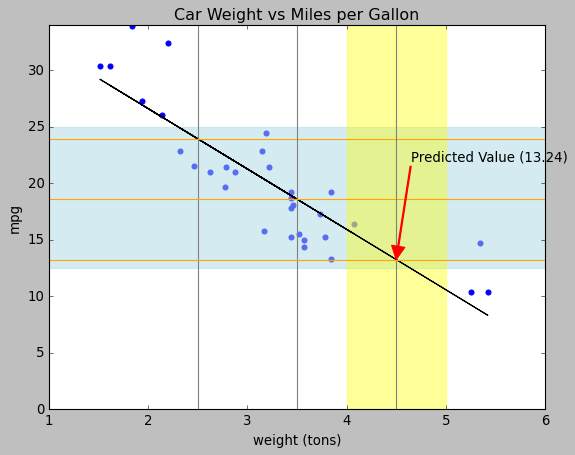

In [37]:
# Command to find the styles available:
# plt.style.available

plt.style.use('classic')
plt.title("Car Weight vs Miles per Gallon")
plt.xlabel("weight (tons)")
plt.ylabel("mpg")

# Setting the axis range
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)

plt.axis([xmin,xmax,ymin,ymax])
plt.scatter(x_values,y_values, color='blue')     #color blue
plt.plot(x_values,model.predict(x_values), color='#000000') #color black

#Horizontal and vertical span
plt.axhspan(12.5,25, alpha=0.5, color='#add8e6') #color light blue
plt.axvspan(4.0,5.0, alpha=0.4, color='yellow')

plt.axvline(x=2.5,color='grey')
x_predict = np.array([2.5]).reshape(-1, 1)
plt.axhline(y=model.predict(x_predict), color='orange')
plt.axvline(x=3.5,color='grey')
x_predict = np.array([3.5]).reshape(-1, 1)
plt.axhline(y=model.predict(x_predict), color='orange')
plt.axvline(x=4.5,color='grey')
x_predict = np.array([4.5]).reshape(-1, 1)
plt.axhline(y=model.predict(x_predict), color='orange')

annotated_txt = 'Predicted Value ({:.2f})'.format(model.predict(x_predict)[0])
plt.annotate(annotated_txt, xy=(4.5,model.predict(x_predict)), xytext=(4.65,22), arrowprops={'color':'r','width':1.0})

plt.show()

